In [3]:
import pandas as pd
from pathlib import Path
from glob import glob
import numpy as np
from datetime import datetime,timedelta
from tqdm.notebook import tqdm

In [13]:
files_list = glob(r'../../Data/Caravela/CaravelaPCS/Datalog/Y20/*/*'+ '/group1*')  
files_list.sort()

li = []

for filename in tqdm(files_list):
    df = pd.read_csv(filename)
    li.append(df)

sl = pd.concat(li, axis=0)

In [14]:
files_list

['../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D15/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D15/group1_002.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D16/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D19/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D22/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D23/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D24/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D25/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D26/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D27/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D28/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D29/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D30/group1_001.csv',
 '../../Data/Caravela/CaravelaPCS/Datalog/Y20/M01/D31/group1_001.csv',
 '../.

In [15]:
subset = pd.DataFrame()
subset['datetime'] = (sl['Date'].astype(str) +' '+ sl['Time'])
subset['relative_wind_angle'] = sl['U1_??MWV_F1']
subset['relative_wind_angle_flag'] = sl['U1_??MWV_F2']
subset['relative_wind_speed'] = sl['U1_??MWV_F3']
subset['relative_wind_speed_unit'] = sl['U1_??MWV_F4']
subset = subset.reset_index()

In [16]:
dt = []
for i in tqdm(range(len(subset['datetime']))):
    dt.append(datetime.strptime(subset['datetime'][i], '%y%m%d %H:%M:%S'))
subset['datetime UTC'] = dt

In [17]:
subset = subset.drop(['index'],axis=1)

In [18]:
subset = subset.drop(['datetime'],axis=1)

In [19]:
subset.to_csv('../../Products/CARAVELA_wind.csv',index = None)

In [4]:
baa = pd.read_csv('../../Products/CARAVELA_wind.csv')# import file to test it

In [5]:
x=[]
for i in tqdm(range(len(baa['datetime UTC']))):
    x.append(datetime.strptime(baa['datetime UTC'][i], '%Y-%m-%d %H:%M:%S'))
baa['datetime_parsed'] = x

In [6]:
baa

,relative_wind_angle,relative_wind_angle_flag,relative_wind_speed,relative_wind_speed_unit,datetime UTC,datetime_parsed
0,0.0,NaN,0.0,NaN,2020-01-15 12:02:42,2020-01-15 12:02:42
1,0.0,NaN,0.0,NaN,2020-01-15 12:02:42,2020-01-15 12:02:42
2,0.0,NaN,0.0,NaN,2020-01-15 12:02:42,2020-01-15 12:02:42
3,0.0,NaN,0.0,NaN,2020-01-15 12:02:42,2020-01-15 12:02:42
4,0.0,NaN,0.0,NaN,2020-01-15 12:02:42,2020-01-15 12:02:42
...,...,...,...,...,...,...
28779592,0.0,NaN,0.0,NaN,2020-02-24 17:36:06,2020-02-24 17:36:06
28779593,0.0,NaN,0.0,NaN,2020-02-24 17:36:06,2020-02-24 17:36:06
28779594,0.0,NaN,0.0,NaN,2020-02-24 17:36:06,2020-02-24 17:36:06
28779595,0.0,NaN,0.0,NaN,2020-02-24 17:36:06,2020-02-24 17:36:06


In [9]:
import matplotlib.pyplot as plt
font_size=22
plt.rcParams.update({'font.size': font_size})

Text(0.5, 0, 'Datetime')

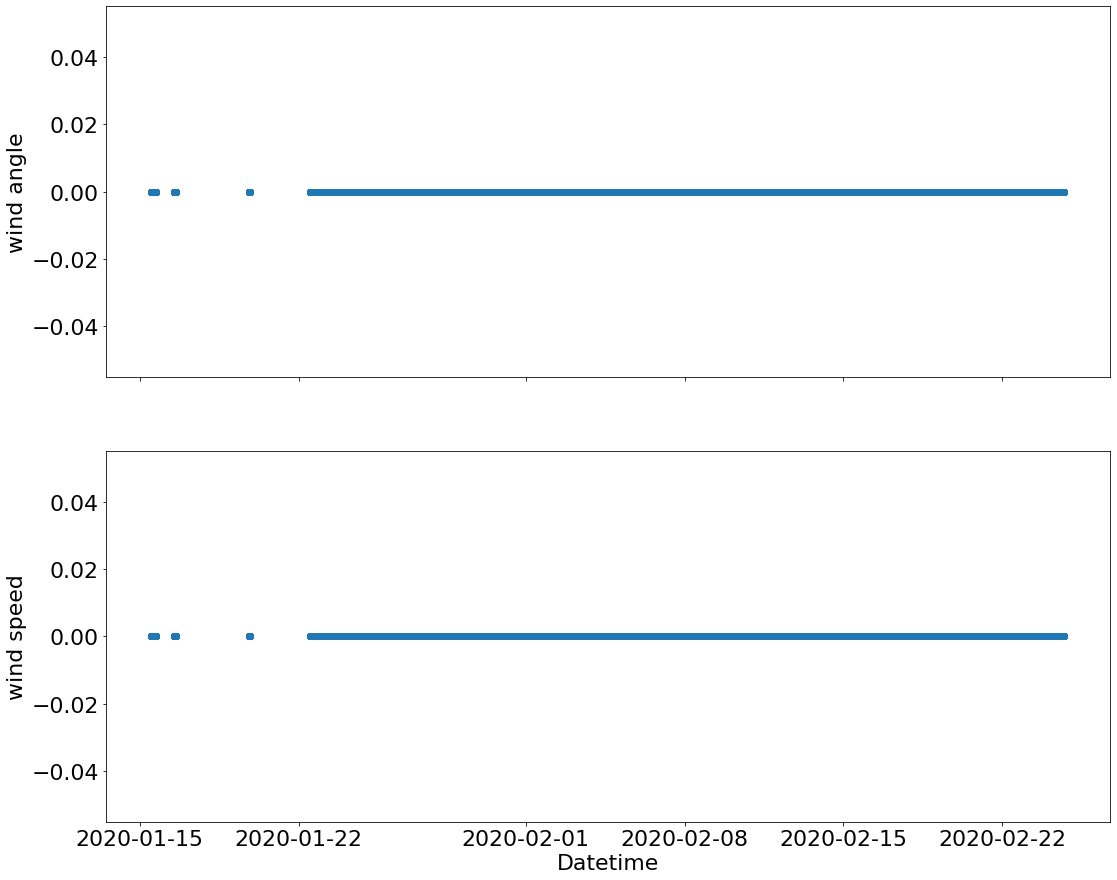

In [10]:
fig,ax = plt.subplots(2,1, figsize=(18, 15),sharex=True)
ax=ax.ravel()
#ax[0].set_ylim(0,360.0)
#ax[1].set_ylim(-30,30)
ax[0].scatter(baa.datetime_parsed, baa['relative_wind_angle'])
ax[1].scatter(baa.datetime_parsed, baa['relative_wind_speed'])
ax[0].set_ylabel('wind angle')
ax[1].set_ylabel('wind speed')
ax[1].set_xlabel('Datetime')